#**Exploratory Data Analysis on Haberman Dataset**


In this assignment, we will be performing EDA on Haberman's Survival Data Set.

This dataset contains data from the study conducted in University of Chicago’s Billings Hospital between year 1958 to 1970 for the patients who underwent surgery for breast cancer.


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [5]:
from google.colab import files
uploaded = files.upload()

Saving haberman.csv to haberman.csv


In [6]:
import io
data = pd.read_csv(io.BytesIO(uploaded['haberman.csv']))

In [7]:
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [8]:
print(data.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [9]:
data.shape

(306, 4)

In [10]:
data["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

In [11]:
data["nodes"].value_counts()

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: nodes, dtype: int64

In [12]:
data["year"].value_counts()

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: year, dtype: int64

In [13]:
data["age"].value_counts()

52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: age, dtype: int64

In [14]:
data["status"] = data["status"].map({1:"Yes", 2:"No"})



In [15]:
data.head()


,age,year,nodes,status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [16]:
data.tail()

,age,year,nodes,status
301,75,62,1,Yes
302,76,67,0,Yes
303,77,65,3,Yes
304,78,65,1,No
305,83,58,2,No


In [17]:
data.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


###Until now, we have made the following observations:

-> There are 306 rows and 4 columns

-> No null values present


-> The four features are as follows:

i) Age -
Tells you the age of the patient at the time they underwent surgery. It is of the type int and it's value ranges from 30-83.


ii) Year -
Tells the year of the surgery for each patient. It is of the type int, it's value ranges from 58-69.

iii) Nodes - Denotes the lymph nodes present. It is of the type int and it's value ranges from 0-52.


iv) Status (target variable) -
This is a categorical variables as it takes 2 values - 1,2. If patients survived 5 years or more is represented as 1 and patients who survived less than 5 years is represented as 2. It's datatype is int, but as it takes only 2 values, we can map this value to a name which makes more sense and understandable like yes, no etc.

There are 225 datapoints for label 1 and 81 datapoints for label 2. That is,  73.5% of the datapoints belongs to label 1 ('Yes') and 26.47% of the datapoints belongs to label 2 ('No'). Hence, the dataset is not balanced.





## Pair Plots:

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


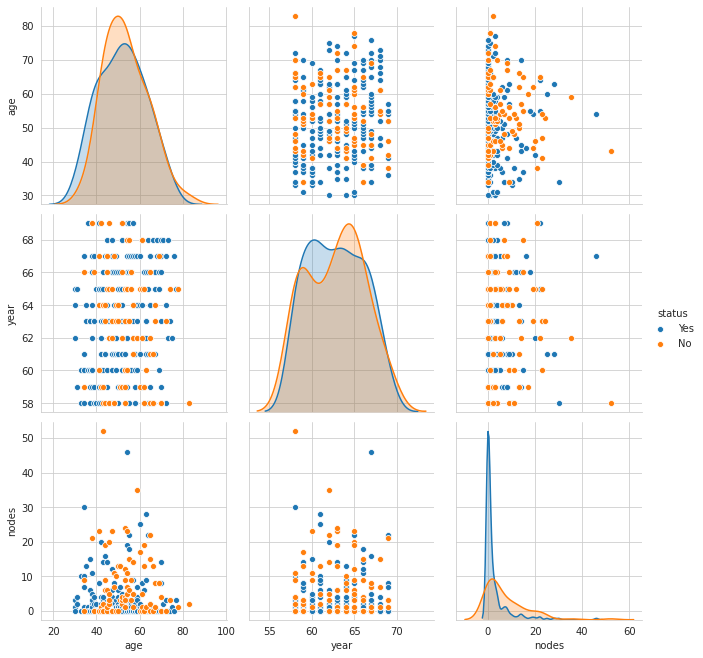

In [18]:
sns.set_style("whitegrid");
sns.pairplot(data, hue="status", size=3);
plt.show()

The above plot is called a pair plot. The orange datapoint refers to label No(survive <5 yrs), blue datapoint corresponds to label Yes (survive >5 yrs).

The diagonal plots represent the pdf ( Probability Distribution Function) of the features. The non-diagonal plots represent scatter plots between two features.

In the scatter plot between the year and age features, we see that most patients below age=40 are survivors. But due to the unbalanced nature of dataset we can't be too sure. From the pair plots, we can't see any clear separation between the points of the two classes.






## Analyzing PDFs of various features

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


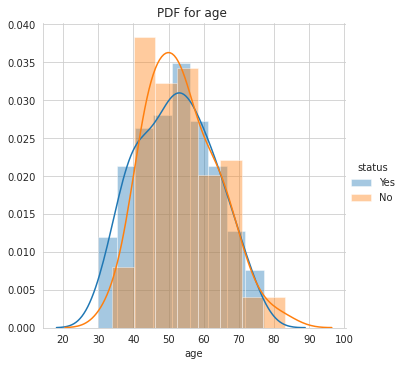

In [34]:
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend(); 

plt.title('PDF for age ');
plt.show();

We can see a lot of overlap between the pdfs of age for the two classes.
It can be seen that approximately patients with age <=34 have survived,      patients with age >75 have not survived.



/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


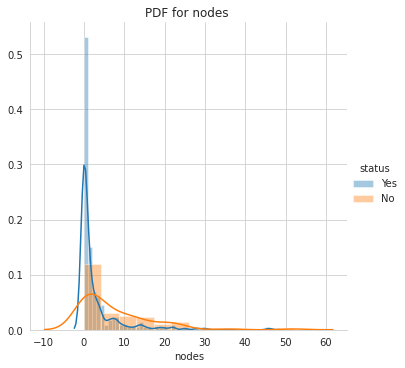

In [35]:
sns.FacetGrid(data,hue="status",size=5)\
   .map(sns.distplot,"nodes") \
   .add_legend();
plt.title('PDF for nodes ');
plt.show();   


From the above plot, it can be seen that more than 50% of patients belonging to survived class (Yes) have 0 nodes . 


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


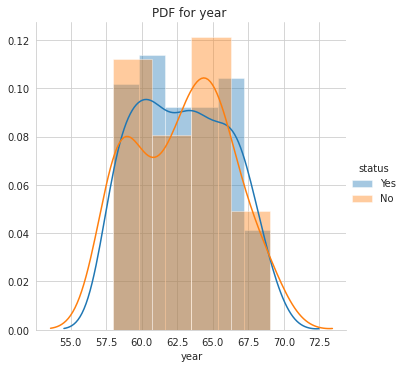

In [36]:
sns.FacetGrid(data,hue="status",size=5)\
   .map(sns.distplot,"year") \
   .add_legend();
plt.title('PDF for year ');   
plt.show(); 

We can see a lot of overlap between the pdfs of year for the two classes. Nothing conclusive regarding the target variable is observed.

## Analyzing CDFs

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


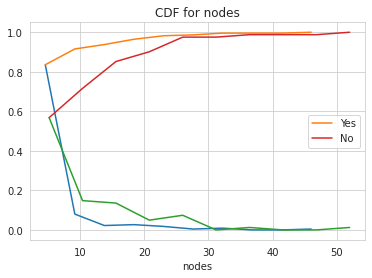

In [37]:
status_yes = data[data[ "status"]=="Yes"]
status_no = data[data["status"]=="No"]
counts1, bin_edges1 = np.histogram(status_yes["nodes"], bins=10, density = True)
pdf1 = counts1/(sum(counts1))
print(pdf1);
print(bin_edges1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1, label = 'Yes')
plt.xlabel('nodes')
print("")
print("")
counts2, bin_edges2 = np.histogram(status_no['nodes'], bins=10, density = True)
pdf2 = counts2/(sum(counts2))
print(pdf2);
print(bin_edges2)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:], pdf2)
plt.plot(bin_edges2[1:], cdf2, label = 'No')
plt.xlabel('nodes')
plt.legend()
plt.title('CDF for nodes');
plt.show()

From all the patients that survived, about 83% of them had nodes<=4.

In [23]:
status_yes.describe()

,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [24]:
status_no.describe()

,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


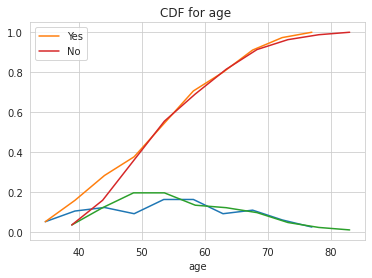

In [38]:
counts1, bin_edges1 = np.histogram(status_yes["age"], bins=10, density = True)
pdf1 = counts1/(sum(counts1))
print(pdf1);
print(bin_edges1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1, label = 'Yes')
plt.xlabel('age')
print("")
print("")
counts2, bin_edges2 = np.histogram(status_no['age'], bins=10, density = True)
pdf2 = counts2/(sum(counts2))
print(pdf2);
print(bin_edges2)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:], pdf2)
plt.plot(bin_edges2[1:], cdf2, label = 'No')
plt.xlabel('age')
plt.legend()
plt.title('CDF for age ');
plt.show()

For the "age" the cdf's start to overlap at age=50. Below the age 50, there is a slightly higher chance to survive as compared to not surviving. This observation is very specific to this dataset and can't be generalized for all data.

## Analyzing Box plots

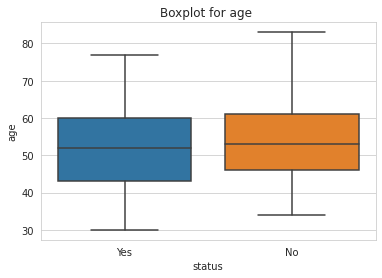

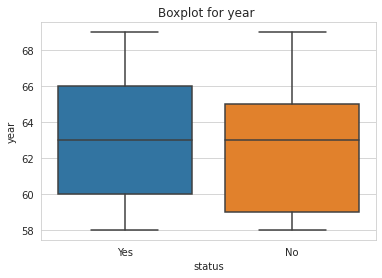

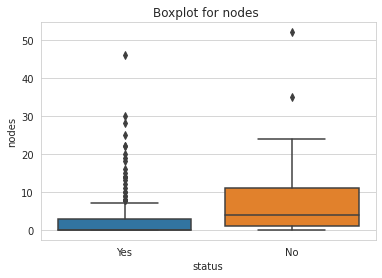

In [39]:
sns.boxplot(x='status',y='age',data=data)
plt.title('Boxplot for age ');
plt.show()
sns.boxplot(x='status',y='year',data=data)
plt.title('Boxplot for year ');
plt.show()
sns.boxplot(x='status',y='nodes',data=data)
plt.title('Boxplot for nodes ');
plt.show()


Most obvious observation is that, the box plots for nodes show that the values of nodes are approx 5 and below for 'Yes' class.

##Analyzing Violin plots

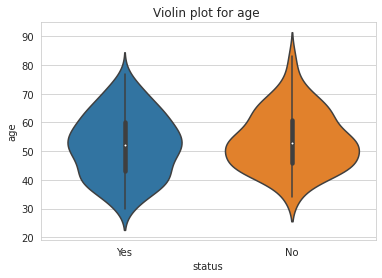

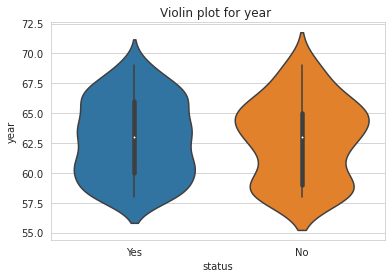

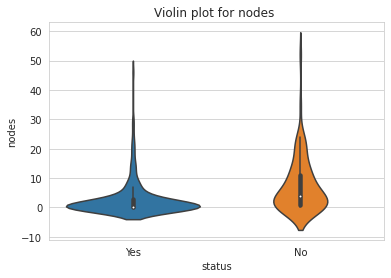

In [40]:
sns.violinplot(x= 'status',y= 'age',data = data,height = 10)
plt.title('Violin plot for age ');
plt.show()
sns.violinplot(x= 'status',y='year',data = data,height = 10)
plt.title('Violin plot for year ');
plt.show()
sns.violinplot(x= 'status',y='nodes',data = data,height = 10)
plt.title('Violin plot for nodes ');
plt.show()

From the above plots, we can say that the peak of the pdf for 'Yes' is at 0 nodes and the peak is steep.
The interquartile range for 'Yes' is approx 0-5, 'No' is approx 0-11 for nodes.
For age, the mean and IQR is almost the same, peak of the pdf for 'Yes' ranges from 50-60, peak of the pdf ranges from 'No' is 45-55.

Generally, as the nodes increase, chances of survival may decrease.

##Analyzing Contour Plots

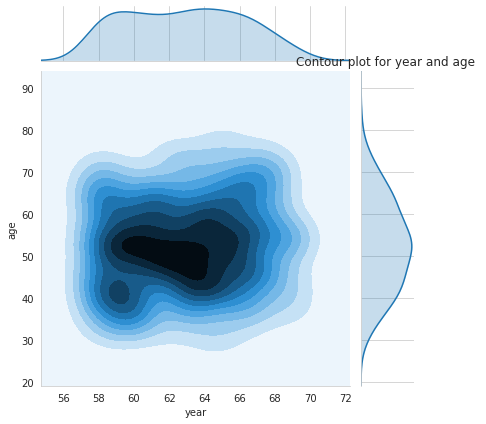

In [41]:
sns.jointplot(x = "year", y = "age", data = data, kind = 'kde')
plt.title('Contour plot for year and age ');
plt.show()

It can be observed that in year 1960-1964, more operations were done on the age group 45-55 compared to other age groups.

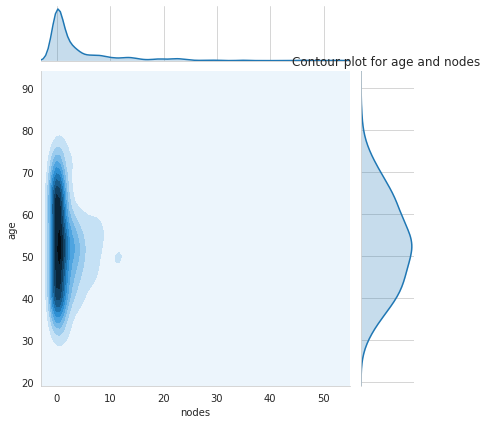

In [42]:
sns.jointplot(x = "nodes", y = "age", data = data, kind = 'kde')
plt.title('Contour plot for age and nodes ');
plt.show()

Highest concentration of the data is between ages 45-65 (approx) and most patients have nodes < 5

##Final Conclusions:

1) The dataset is imbalanced (73.5% for 'Yes' 26.4% for 'No'). Due to this reason, the observations and conclusions derived can't be generalized.

2) Most of visualization outputs show an overlap and no distinct separation between the two classes.

3) Out of the three features, "nodes" seem to give a better insight for separating the two classes.

4) Most survivers have 0-1 nodes. So we can say such patients with nodes<=1 have a better chance at survival, but there are non-survivers who had 0-1 nodes and survivers who had nodes > 1. So we can't claim this fact for sure.

5) It can be seen that approximately patients with age <=34 have survived, patients with age >75 have not survived from the pdfs. But due to imbalanced data, we can't be too sure.